### Clustering (군집화)
- 비지도학습 으로 정답없이, 특징만 가지고 있는 데이터 모델을 구현

### 문제 정의
: 키와 몸무게로 학생들을 3그룹으로 분류

In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

In [38]:
df = pd.read_csv('../data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


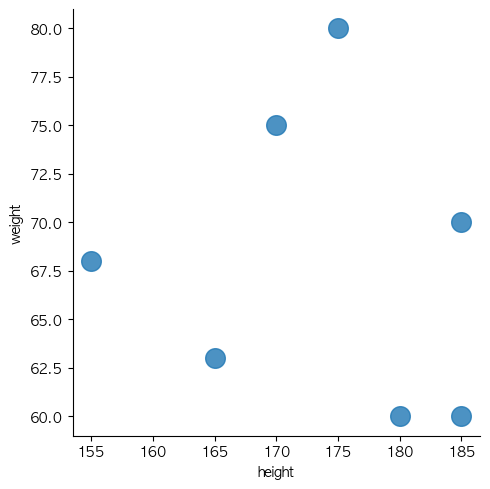

In [12]:
# 시각화로 눈으로 먼저 함 봐보자

sns.lmplot(
    x='height',
    y='weight', 
    data=df, 
    fit_reg=False, 
    scatter_kws={'s':200}
    )
plt.show()

In [7]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [8]:
# 각 군집의 중심위치 
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [160.        ,  65.5       ],
       [172.5       ,  77.5       ]])

In [10]:
kmeans.labels_

array([0, 0, 0, 1, 1, 2, 2], dtype=int32)

In [11]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = kmeans.labels_
df.head()

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,1
4,155,68,1


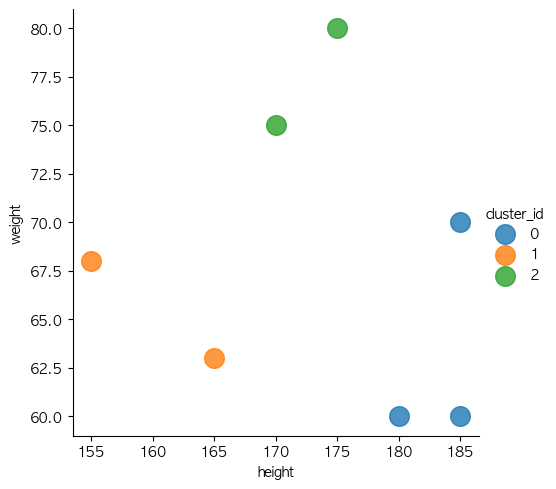

In [13]:
# 시각화로 눈으로 먼저 함 봐보자

sns.lmplot(
    x='height',
    y='weight', 
    data=df, 
    fit_reg=False, 
    scatter_kws={'s':200},
    hue = 'cluster_id'
    )
plt.show()

4분류로 하고 싶다면

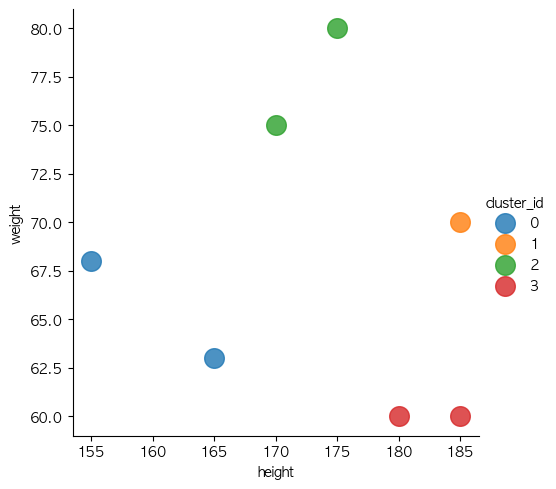

In [14]:
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)

df['cluster_id'] = kmeans.labels_
# 시각화로 눈으로 먼저 함 봐보자

sns.lmplot(
    x='height',
    y='weight', 
    data=df, 
    fit_reg=False, 
    scatter_kws={'s':200},
    hue = 'cluster_id'
    )
plt.show()

---
### Iris

In [44]:
iris = pd.read_csv('../Data/iris.csv')

In [45]:
iris['label'] = iris['Name'].map({'Iris-setosa':0, "Iris-versicolor":1, 'Iris-virginica':2})
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [30]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

---
### KMeans 군집화

In [46]:
iris['cluster_id'] = kmeans.labels_

In [47]:
iris.iloc[[1,51,102],:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,2
102,7.1,3.0,5.9,2.1,Iris-virginica,2,1


In [48]:
iris.cluster_id[iris['cluster_id'] == 1 ] = 5
iris.cluster_id[iris['cluster_id'] == 2 ] = 1
iris.cluster_id[iris['cluster_id'] == 5 ] = 2

In [50]:
iris.iloc[[1,51,102],:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,1
102,7.1,3.0,5.9,2.1,Iris-virginica,2,2


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label,iris.cluster_id)

0.8933333333333333